In [1]:
#  import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New_Dataset/train'
valid_path = '/content/drive/MyDrive/New_Dataset/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/New_Dataset/train/*')

In [6]:
folders

['/content/drive/MyDrive/New_Dataset/train/covid+',
 '/content/drive/MyDrive/New_Dataset/train/normal']

In [7]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 846 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 2 classes.


In [15]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 393s 14s/step - loss: 0.3408 - accuracy: 0.8389 - val_loss: 0.0372 - val_accuracy: 0.9857
Epoch 2/10
27/27 [==============================] - 37s 1s/step - loss: 0.0281 - accuracy: 0.9902 - val_loss: 0.0440 - val_accuracy: 0.9821
Epoch 3/10
27/27 [==============================] - 37s 1s/step - loss: 0.0288 - accuracy: 0.9919 - val_loss: 0.0189 - val_accuracy: 0.9964
Epoch 4/10
27/27 [==============================] - 37s 1s/step - loss: 0.0166 - accuracy: 0.9968 - val_loss: 0.0265 - val_accuracy: 0.9893
Epoch 5/10
27/27 [==============================] - 37s 1s/step - loss: 0.0119 - accuracy: 0.9995 - val_loss: 0.0183 - val_accuracy: 0.9964
Epoch 6/10
27/27 [==============================] - 37s 1s/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 0.0109 - val_accuracy: 0.9964
Epoch 7/10
27/27 [==============================] - 37s 1s/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 8/10
27/27 [

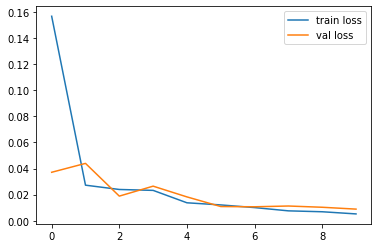

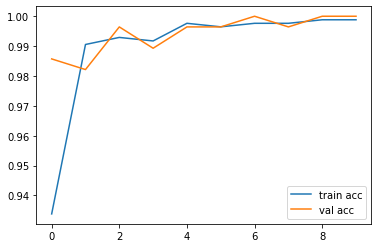

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
model.save('model_vgg19.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[3.71575879e-06, 9.99996305e-01],
       [1.26592374e-06, 9.99998689e-01],
       [9.99647260e-01, 3.52782692e-04],
       [1.01613596e-05, 9.99989867e-01],
       [9.99873996e-01, 1.26037572e-04],
       [9.99988675e-01, 1.12891739e-05],
       [1.00000000e+00, 2.40659688e-08],
       [9.99989867e-01, 1.01225451e-05],
       [1.59575862e-07, 9.99999881e-01],
       [9.98776972e-01, 1.22301420e-03],
       [1.77650407e-04, 9.99822319e-01],
       [9.99860048e-01, 1.39910495e-04],
       [9.64817107e-01, 3.51828784e-02],
       [9.99406815e-01, 5.93182107e-04],
       [1.22356118e-06, 9.99998808e-01],
       [9.99994397e-01, 5.59419368e-06],
       [9.97313321e-01, 2.68669333e-03],
       [9.99961615e-01, 3.83688493e-05],
       [9.98502374e-01, 1.49760058e-03],
       [9.99946237e-01, 5.37614433e-05],
       [9.95322883e-01, 4.67711221e-03],
       [9.51379064e-08, 9.99999881e-01],
       [3.17093991e-02, 9.68290567e-01],
       [3.35746654e-06, 9.99996662e-01],
       [2.129526

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_vgg19.h5')

In [26]:
img=image.load_img('/content/drive/MyDrive/New_Dataset/test/covid+/08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[9.9971575e-01, 2.8426200e-04]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
a

array([0])

In [34]:
if(a==1):
    print("normal")
else:
    print("Covid Positive")

Covid Positive
